In [97]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
df = pd.read_csv('Births2015.csv',parse_dates=['date'],index_col=['date']).drop(['Unnamed: 0'], axis=1)

C:\Users\vasee\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13-01-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\vasee\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14-01-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\vasee\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15-01-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\vasee\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-01-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\vasee\anaconda3\lib

In [101]:
df.head()

,births
date,
2015-01-01,8068
2015-02-01,10850
2015-03-01,8328
2015-04-01,7065
2015-05-01,11892


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [100]:
type(df)

pandas.core.frame.DataFrame

In [102]:
series_values = df.values

In [103]:
series_values

array([[ 8068],
       [10850],
       [ 8328],
       [ 7065],
       [11892],
       [12425],
       [12141],
       [12094],
       [11868],
       [ 8014],
       [ 7172],
       [11479],
       [11924],
       [12013],
       [12339],
       [11861],
       [ 8280],
       [ 7195],
       [10602],
       [12242],
       [12086],
       [11949],
       [11910],
       [ 8235],
       [ 7186],
       [11728],
       [11882],
       [11602],
       [11967],
       [11571],
       [ 7987],
       [ 7139],
       [11480],
       [12079],
       [11924],
       [11821],
       [11656],
       [ 8285],
       [ 7265],
       [11937],
       [12291],
       [11911],
       [12285],
       [11321],
       [ 8390],
       [ 7508],
       [11038],
       [11952],
       [12061],
       [11968],
       [11864],
       [ 8343],
       [ 7254],
       [11260],
       [11941],
       [11828],
       [11672],
       [11596],
       [ 7989],
       [ 7273],
       [11609],
       [12402],
       [

In [54]:
df.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


<AxesSubplot:xlabel='date'>

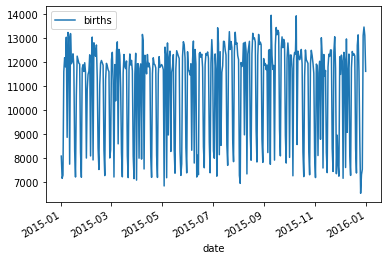

In [104]:
df.plot()

In [109]:
mean_df = df.rolling(window=16).mean()

<AxesSubplot:xlabel='date'>

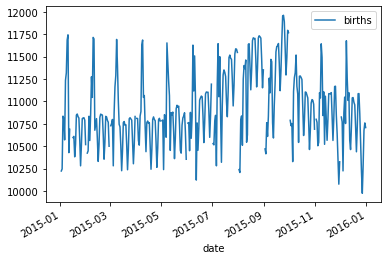

In [110]:
mean_df.plot()

In [111]:
df['forcast'] = df['births'].shift(1)

In [112]:
df.head()

,births,forcast
date,,
2015-01-01,8068,NaN
2015-02-01,10850,8068.0
2015-03-01,8328,10850.0
2015-04-01,7065,8328.0
2015-05-01,11892,7065.0


In [113]:
df.isnull().sum()

births     0
forcast    1
dtype: int64

In [114]:
df = df.dropna(axis = 0)

In [115]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [116]:
birth_error = mean_squared_error(df.births,df.forcast)
birth_error

5162403.576923077

In [117]:
error = np.sqrt(birth_error)
error

2272.092334594498

## ARIMA

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

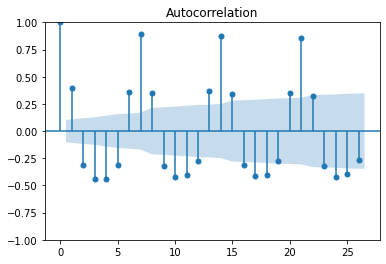

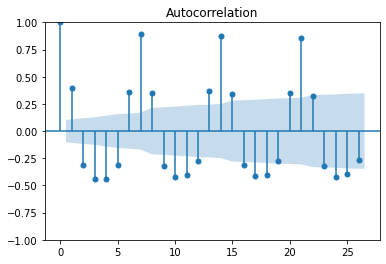

In [119]:
# to find q
plot_acf(df.births)

C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


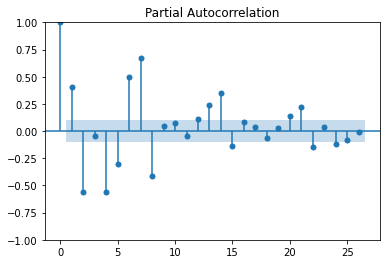

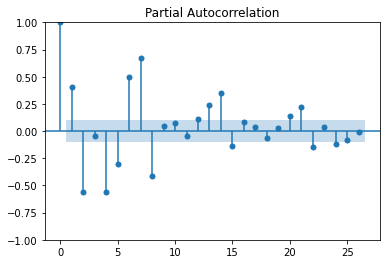

In [120]:
# to find p
plot_pacf(df.births)

In [121]:
#Lets build the model
# p = 3,
# q = 20,22
# d = 0  already stationary 

In [125]:
train_df = df.births[:330]
test_df = df.births[330:]
train_df.size

330

In [142]:
test_df.size

34

In [143]:
from statsmodels.tsa.arima.model import ARIMA

In [144]:
birth_model = ARIMA(train_df, order = (3,0,20))

C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vasee\anaconda3\lib\site-

In [145]:
b_model_fit = birth_model.fit()

C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [146]:
b_model_fit.aic # smaller aic the better

5570.321451762178

In [147]:
birth_forecast = b_model_fit.forecast(steps = 34)

C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [139]:
birth_forecast

330     9856.271626
331     8041.140893
332    10584.713582
333    12806.706011
334    12820.319530
335     9661.936673
336     9715.945560
337    10036.933848
338     7726.039427
339    10342.990126
340    13175.936268
341    12856.876740
342    10199.740238
343     9358.159929
344     9620.499753
345     8517.548778
346    10387.989818
347    12511.389949
348    12521.392977
349    11355.808915
350     9870.454461
351     9198.060106
352     9832.109062
353    11289.620041
354    12467.422634
355    12482.518759
356    11331.446902
357     9888.110066
358     9239.797846
359     9868.424482
360    11292.281829
361    12435.118841
362    12439.573973
363    11310.327669
364     9904.495900
Name: predicted_mean, dtype: float64

In [148]:
arima_error = mean_squared_error(test_df,birth_forecast)

In [149]:
np.sqrt(arima_error)

1620.2536324601895